In [1]:
import cassiopeia as cas
import os
import cassiopeia
import gzip
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import entropy
import scanpy as sc
from cassiopeia.mixins import logger
from typing import Dict, List, Tuple
from cassiopeia.preprocess import (
    alignment_utilities,
    constants,
    map_utils,
    doublet_utils,
    lineage_utils,
    UMI_utils,
    utilities,
)

import random

## T1

In [2]:
gene_names = ['Calr', 'Myl6', 'Calm2', 'Rpl39', 'Cfl1', 'Acta1', 'Hsp90b1', 'Calm1', 'Hint1', 'Btf3', 'Lgals1', 'Slc25a3', 'Tpt1', 'Hsp90ab1', 'Fth1']

In [3]:
umi_table_all = []

for gene in gene_names:
        umi_table = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1/a3026/cassiopeia_result/'+gene+'/'+'umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)
        '''
        plt.figure(figsize=(3,3))
        plt.hist(np.log(umi_table['readCount'])/np.log(10), bins=50)
        plt.xticks(range(5),np.logspace(0,4,5))
        plt.yscale('log')
        plt.title(gene)
        plt.xlabel('reads per UMI')
        plt.ylabel('Frequency')
        plt.show()
        '''
        umi_table_all.append(umi_table)
umi_table_T1 = pd.concat(umi_table_all)


filtered_cell_barcodes_T1_a3026 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T1_a3026.csv',header=0)
filtered_cell_barcodes_T1_a3026 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T1_a3026['cellBC'] ]

umi_table_T1 = umi_table_T1[umi_table_T1['cellBC'].isin(filtered_cell_barcodes_T1_a3026)]
umi_table_T1['Sample'] = 'T1_a3026'
umi_table_T1['cellBC'] = umi_table_T1['Sample'] + '_' + umi_table_T1['cellBC']

## T2 

In [4]:
gene_names = ['Calr', 'Myl6', 'Calm2', 'Rpl39', 'Cfl1', 'Acta1', 'Hsp90b1', 'Calm1', 'Hint1', 'Btf3', 'Lgals1', 'Slc25a3', 'Tpt1', 'Hsp90ab1', 'Fth1']

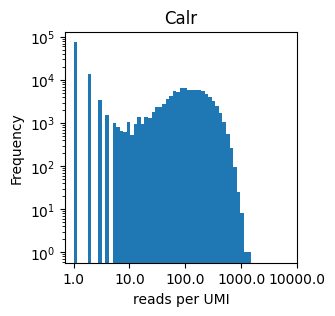

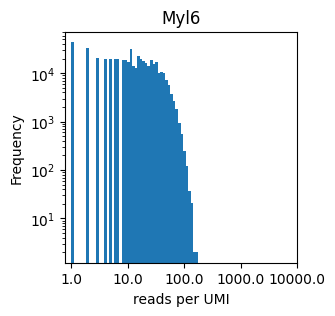

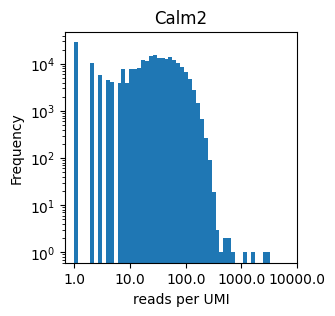

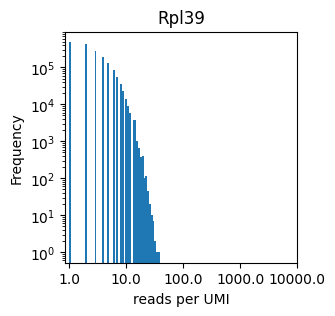

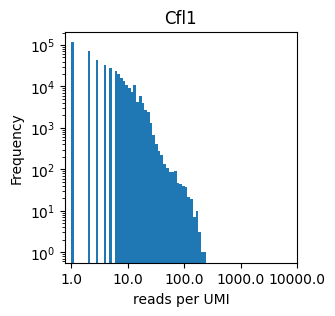

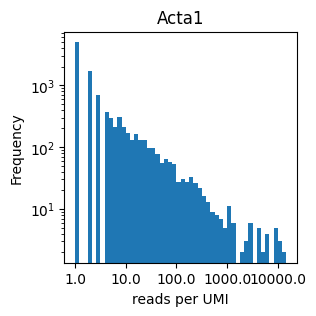

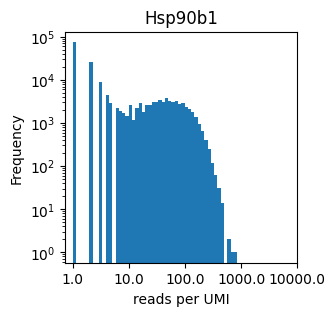

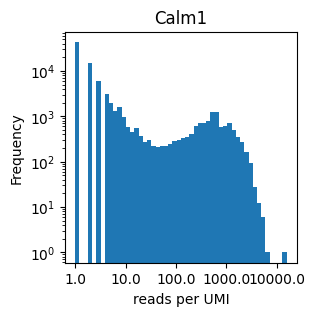

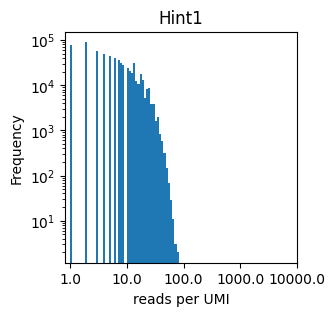

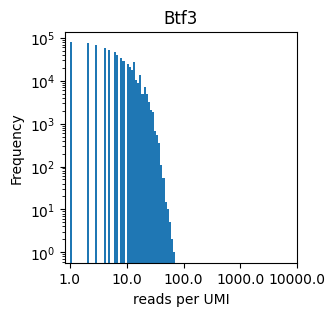

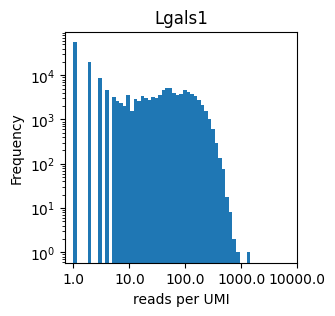

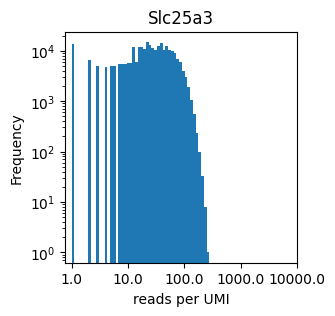

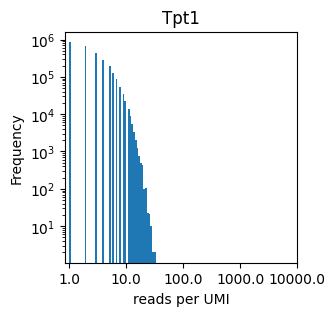

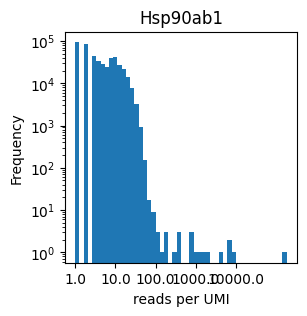

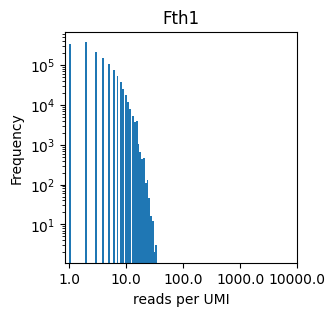

/tmp/ipykernel_293714/1504330671.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3026_1['Sample'] = 'T2_a3026_1'
/tmp/ipykernel_293714/1504330671.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3026_1['cellBC'] = umi_table_T2_a3026_1['Sample'] + '_' + umi_table_T2_a3026_1['cellBC']
/tmp/ipykernel_293714/1504330671.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [5]:
umi_table_all = []
for gene in gene_names:
        umi_table = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T2/a3026/cassiopeia_result/'+gene+'/'+'umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

         
        plt.figure(figsize=(3,3))
        plt.hist(np.log(umi_table['readCount'])/np.log(10), bins=50)
        plt.xticks(range(5),np.logspace(0,4,5))
        plt.yscale('log')
        plt.title(gene)
        plt.xlabel('reads per UMI')
        plt.ylabel('Frequency')
        plt.show()
        
        
        umi_table_all.append(umi_table)
umi_table_T2 = pd.concat(umi_table_all)
umi_table_T2 

filtered_cell_barcodes_T2_a3026_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3026_1.csv',header=0)
filtered_cell_barcodes_T2_a3026_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3026_1['cellBC'] ]

umi_table_T2_a3026_1 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3026_1)]
umi_table_T2_a3026_1['Sample'] = 'T2_a3026_1'
umi_table_T2_a3026_1['cellBC'] = umi_table_T2_a3026_1['Sample'] + '_' + umi_table_T2_a3026_1['cellBC']

filtered_cell_barcodes_T2_a3026_2 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3026_2.csv',header=0)
filtered_cell_barcodes_T2_a3026_2 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3026_2['cellBC'] ]

umi_table_T2_a3026_2 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3026_2)]
umi_table_T2_a3026_2['Sample'] = 'T2_a3026_2'
umi_table_T2_a3026_2['cellBC'] = umi_table_T2_a3026_2['Sample'] + '_' + umi_table_T2_a3026_2['cellBC']

## T3

In [6]:
gene_names = ['Calr', 'Myl6', 'Calm2', 'Rpl39', 'Cfl1', 'Acta1', 'Hsp90b1', 'Calm1', 'Hint1', 'Btf3', 'Lgals1', 'Slc25a3', 'Tpt1', 'Hsp90ab1', 'Fth1']

In [7]:
umi_table_all = []
for gene in gene_names:
        umi_table = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T3/a3026/cassiopeia_result/'+gene+'/'+'umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)
        '''
        plt.figure(figsize=(3,3))
        plt.hist(np.log(umi_table['readCount'])/np.log(10), bins=50)
        plt.xticks(range(5),np.logspace(0,4,5))
        plt.yscale('log')
        plt.title(gene)
        plt.xlabel('reads per UMI')
        plt.ylabel('Frequency')
        plt.show()
        '''
        
        umi_table_all.append(umi_table)
umi_table_T3 = pd.concat(umi_table_all)


filtered_cell_barcodes_T3_a3026_1_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3026_1_1.csv',header=0)
filtered_cell_barcodes_T3_a3026_1_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3026_1_1['cellBC'] ]
umi_table_T3_a3026_1_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3026_1_1)]
umi_table_T3_a3026_1_1['Sample'] = 'T3_a3026_1_1'
umi_table_T3_a3026_1_1['cellBC'] = umi_table_T3_a3026_1_1['Sample'] + '_' + umi_table_T3_a3026_1_1['cellBC']

filtered_cell_barcodes_T3_a3026_2_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3026_2_1.csv',header=0)
filtered_cell_barcodes_T3_a3026_2_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3026_2_1['cellBC'] ]
umi_table_T3_a3026_2_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3026_2_1)]
umi_table_T3_a3026_2_1['Sample'] = 'T3_a3026_2_1'
umi_table_T3_a3026_2_1['cellBC'] = umi_table_T3_a3026_2_1['Sample'] + '_' + umi_table_T3_a3026_2_1['cellBC']

/tmp/ipykernel_293714/2259779110.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3026_1_1['Sample'] = 'T3_a3026_1_1'
/tmp/ipykernel_293714/2259779110.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3026_1_1['cellBC'] = umi_table_T3_a3026_1_1['Sample'] + '_' + umi_table_T3_a3026_1_1['cellBC']
/tmp/ipykernel_293714/2259779110.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

## filter

In [8]:
umi_table_df = pd.concat([umi_table_T1, 
                       umi_table_T2_a3026_1,umi_table_T2_a3026_2,
                       umi_table_T3_a3026_1_1,umi_table_T3_a3026_2_1], ignore_index=True)

In [9]:
umi_table = umi_table_df.sort_values(by='readCount',ascending=False).groupby(['Sample','cellBC','UMI']).head(1)
umi_table = umi_table[umi_table['indel_length'] < 50]
umi_table = umi_table[umi_table['length_M'] > 90]
umi_table = umi_table[umi_table['Mismatch_num'] < 15 ]
umi_table = umi_table[umi_table['readCount'] >= 3 ]

In [10]:
gene_names=['Calr', 'Myl6', 'Calm2', 'Rpl39', 'Cfl1', 'Acta1', 'Hsp90b1', 'Calm1', 
            'Hint1', 'Btf3', 'Lgals1', 'Slc25a3', 'Tpt1', 'Hsp90ab1', 'Fth1']
cut_sites = [80,91,93,87,63,89,89,84,86,94,48,87,89,85,89]
wc = [-17,-3,-3,-17,-3,-17,-3,-17,-3,-17,-17,-17,-17,-3,-17]

intBC_cutSite = pd.concat([pd.DataFrame(data=gene_names,columns=['intBC']),pd.DataFrame(data=cut_sites,columns=['cut_site']),
                          pd.DataFrame(data=wc,columns=['wc'])],axis=1)

In [11]:
umi_table = pd.merge(intBC_cutSite,umi_table,how='inner',on=['intBC'])

In [12]:
## constrain cut site in 30bp the left and right of the cutsite location

def filter_based_on_region(edit):
    cut_site = edit[0]
    mark = np.zeros(200)
    r1 = edit[1]
    #print(edit)
    if 'None' in r1:
        return 'passed'
    indels = re.findall(r'(\d+)([MIDNSHP=X])', r1)
    positions = re.findall(r'(\d+)(:)', r1)
    for indel, position in zip(indels,positions):
        #print(position)
        pos = int(position[0])
        if abs(pos-cut_site)<=12: 
            count = int(indel[0])
            mark[pos:pos+count] = 1
        else:
            return 'failed'

    min_pos = np.where(mark==1)[0][0]
    max_pos = np.where(mark==1)[0][-1]
    cut_min = cut_site - 30
    cut_max = cut_site + 30

    if cut_min > min_pos or cut_max < max_pos:
        return 'failed'
    else:
        return 'passed'
    
#def within_three_bases_upstream(edit,cutsite,wc):

In [13]:
umi_table['r1_isvalid'] = umi_table[['cut_site','r1']].apply(filter_based_on_region,axis=1)
umi_table = umi_table[umi_table['r1_isvalid']=='passed']

In [14]:
umi_table

,intBC,cut_site,wc,readName,AlignmentScore,CIGAR,Mismatch,Mismatch_num,QueryBegin,Ref,...,cellBC,indel_length,indel_num,length_M,r1,readCount,reads_indel_length,reads_indel_num,Sample,r1_isvalid
0,Calr,80,-17,GAGCCTGCACCTCTAC_TTCGTTCATCCC_1485,687,75M14D69M,[],0,6,GAAGGGGGTGGTGTTTTCCCTCCCCCCGCACTGAGGAAGAATGGGG...,...,T2_a3026_1_GAGCCTGCACCTCTAC,14,1,144,76:14D,1485,14,1,T2_a3026_1,passed
1,Calr,80,-17,AACCACAGTGACACAG_TGTGCTTATGTC_1133,670,74M13D70M,"[[70, 'T>G'], [71, 'G>C']]",2,6,GAAGGGGGTGGTGTTTTCCCTCCCCCCGCACTGAGGAAGAATGGGG...,...,T2_a3026_2_AACCACAGTGACACAG,13,1,144,75:13D,1133,13,1,T2_a3026_2,passed
4,Calr,80,-17,TCATGCCTCGCGATCG_CCGCGCAACGCA_973,687,79M5D65M,"[[79, 'G>T']]",1,6,GAAGGGGGTGGTGTTTTCCCTCCCCCCGCACTGAGGAAGAATGGGG...,...,T2_a3026_2_TCATGCCTCGCGATCG,5,1,144,80:5D,973,5,1,T2_a3026_2,passed
7,Calr,80,-17,TTACGCCAGAAGCGCT_CTCTTACAAGCA_950,687,75M14D69M,[],0,6,GAAGGGGGTGGTGTTTTCCCTCCCCCCGCACTGAGGAAGAATGGGG...,...,T2_a3026_1_TTACGCCAGAAGCGCT,14,1,144,76:14D,950,14,1,T2_a3026_1,passed
8,Calr,80,-17,TCGCACTTCAGCAATC_ACTGAAGATACC_942,690,77M11D67M,[],0,6,GAAGGGGGTGGTGTTTTCCCTCCCCCCGCACTGAGGAAGAATGGGG...,...,T2_a3026_1_TCGCACTTCAGCAATC,11,1,144,78:11D,942,11,1,T2_a3026_1,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027055,Fth1,89,-17,CTCTCGAAGGTAAGTT_AAACGGGCGACA_3,720,144M,[],0,6,GACACGGTGATGAGAGCTAAGCTGACTTCCCCAAAGCCACGTGACT...,...,T3_a3026_2_1_CTCTCGAAGGTAAGTT,0,0,144,None,3,0,0,T3_a3026_2_1,passed
18027056,Fth1,89,-17,GAGTGTTTCCATTGCC_GGAACAGATTTG_3,695,87M6D57M,[],0,6,GACACGGTGATGAGAGCTAAGCTGACTTCCCCAAAGCCACGTGACT...,...,T3_a3026_2_1_GAGTGTTTCCATTGCC,6,1,144,88:6D,3,6,1,T3_a3026_2_1,passed
18027058,Fth1,89,-17,GAGTGTTTCAACCTCC_ACGTAACTGGCG_3,720,144M,[],0,6,GACACGGTGATGAGAGCTAAGCTGACTTCCCCAAAGCCACGTGACT...,...,T3_a3026_2_1_GAGTGTTTCAACCTCC,0,0,144,None,3,0,0,T3_a3026_2_1,passed
18027059,Fth1,89,-17,CTCTCGAAGGTAAGTT_CCCAGTCCAGTT_3,720,144M,[],0,6,GACACGGTGATGAGAGCTAAGCTGACTTCCCCAAAGCCACGTGACT...,...,T3_a3026_2_1_CTCTCGAAGGTAAGTT,0,0,144,None,3,0,0,T3_a3026_2_1,passed


In [15]:
allele_table = (
    umi_table.groupby(['Sample',"cellBC", "intBC", "r1",'allele'])
    .agg({"readCount": "sum", "UMI": "count"})
    .reset_index()
    .sort_values(["UMI", "readCount"], ascending=False)
)


allele_table['UMI_ratio'] = allele_table['UMI'] / allele_table.groupby(['Sample',"cellBC", "intBC"])['UMI'].transform('sum')
allele_table = allele_table[allele_table['UMI'] >= 2]

In [16]:
allele_table.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_allele_table_raw.csv')

In [16]:
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv',header=0)
allele_table = pd.merge(allele_table,cell_lineage,how='inner',on=['cellBC'])

In [17]:
allele_table.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_allele_table.csv')

In [1]:
import pandas as pd
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.new.csv',header=0,index_col=0)
allele_table_a3026 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_allele_table.csv',header=0,index_col=0,na_filter=False)
allele_table_a3026['lineageGrp'] = cell_lineage.loc[allele_table_a3026.cellBC,'lineageGrp'].to_list()
allele_table_a3026.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_allele_table.new.csv')
allele_table_a3026

,Sample,cellBC,intBC,r1,allele,readCount,UMI,UMI_ratio,lineageGrp
0,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Tpt1,None,None,5648,967,0.967000,C10
1,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Btf3,None,None,827,96,0.989691,C10
2,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Calm2,None,None,3075,88,0.897959,C10
3,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Hint1,None,None,624,70,0.958904,C10
4,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Slc25a3,None,None,882,64,1.000000,C10
...,...,...,...,...,...,...,...,...,...
497637,T1_a3026,T1_a3026_TGGGTTACAATTCTTC,Hsp90b1,88:8D,88:8D,70,2,0.400000,C84
497638,T1_a3026,T1_a3026_TGGGTTACAATTCTTC,Fth1,90:8D,90:8D,6,2,0.400000,C84
497639,T1_a3026,T1_a3026_TGGGTTACAATTCTTC,Rpl39,None,None,6,2,0.200000,C84
497640,T1_a3026,T1_a3026_ACAAAGATCCATCAGA,Cfl1,None,None,56,5,0.833333,C60
